In [2]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy


In [4]:
img_cv = cv2.imread('./Selected/052.jpeg') #中文名片

cv2.imshow('Card',img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
#from PIL import Image
print("正在載入圖片...")
img_p1 = Image.open('./Selected/1_20250514.jpg')#中文名片
img_p2 = Image.open('./Selected/2_20250514.jpg')#英文文名片
print("圖片載入成功！")



type(img_p1)


正在載入圖片...
圖片載入成功！


PIL.JpegImagePlugin.JpegImageFile

In [18]:
type(img_cv)

numpy.ndarray

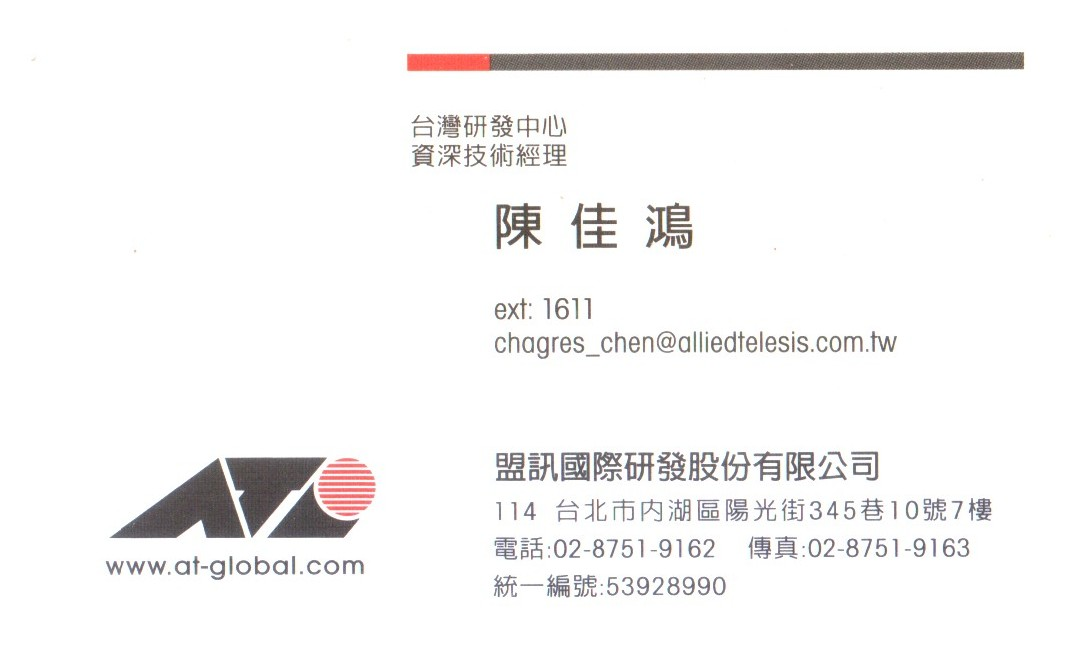

In [25]:
img_p1

In [28]:
# 執行 OCR
#text = pytesseract.image_to_string(img_p1) #僅處理英文

text = pytesseract.image_to_string(img_p1, lang='chi_tra')  # 繁體中文

# 輸出結果
print(text)

台灣研發中心
資深技術經理

陳佳鴻

ex': 1611

chggres_chen@olliedfelesis.com.iw

諒 ˋ/

www.qf-globogl.com

盟訊國際研發股份有限公司
114 台北市內湖區陽光街345巷10號7
電話:02-8751-9162

樓
傳真:02-8751-9163
統一編號:53928990




In [8]:
import cv2
import numpy as np

# 讀取圖像
img = cv2.imread('./Selected/2_20250514.jpg')

# 轉換為灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# 進行 OCR
text = pytesseract.image_to_string(binary)

# 輸出結果
print(text)

Taiwan R&D centre
Senior Technical Manager

Chagres Chen

ext 161]
chagres_chen@alliedtelesis.com.tw

Allied Telesis Labs (laiwan), Inc.
7F., No.10, Lane 345, YangGuang St.,

NeiHu Chiu, Taipei City 114, Taiwan R.O.C

Tel +886-2-8751-9162

FAX: +8862 8751 9163

MV

www.at-global.com



In [12]:
import cv2
import numpy as np

# 讀取圖像
img = cv2.imread('./Selected/2_20250514.jpg')
# 獲取文本框位置
boxes = pytesseract.image_to_boxes(img)

# 獲取文本、置信度和位置
data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

# 獲取以字詞為單位的信息
words = pytesseract.image_to_data(img)

print (words)
print("\n")


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1004	656	-1	
2	1	1	0	0	0	345	106	315	56	-1	
3	1	1	1	0	0	345	106	315	56	-1	
4	1	1	1	1	0	345	106	227	21	-1	
5	1	1	1	1	1	345	107	83	20	95.624817	Taiwan
5	1	1	1	1	2	437	106	51	21	95.624817	R&D
5	1	1	1	1	3	496	107	76	20	95.569763	centre
4	1	1	1	2	0	345	135	315	27	-1	
5	1	1	1	2	1	345	135	72	21	96.350021	Senior
5	1	1	1	2	2	424	136	113	20	96.486115	Technical
5	1	1	1	2	3	547	136	113	26	96.422592	Manager
2	1	2	0	0	0	426	196	359	48	-1	
3	1	2	1	0	0	426	196	359	48	-1	
4	1	2	1	1	0	426	196	359	48	-1	
5	1	2	1	1	1	426	196	209	48	92.709000	Chagres
5	1	2	1	1	2	655	197	130	37	96.519997	Chen
2	1	3	0	0	0	426	295	403	61	-1	
3	1	3	1	0	0	426	295	403	61	-1	
4	1	3	1	1	0	426	295	97	22	-1	
5	1	3	1	1	1	426	296	37	21	92.542618	ext:
5	1	3	1	1	2	475	295	48	22	92.532509	1611
4	1	3	1	2	0	426	329	403	27	-1	
5	1	3	1	2	1	426	329	403	27	89.305832	chagres_chen@alliedtelesis.com.tw
2	1	4	0	0	0	424	451	520	165	-1	
3	1	4	1	0	0	425

In [14]:
import cv2  

img = cv2.imread('./Selected/2_20250514.jpg')
h, w, _ = img.shape
#標示有問題
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x, h - y), (w, h - h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [15]:
import cv2
import pytesseract

img = cv2.imread('./Selected/2_20250514.jpg')
h, w, _ = img.shape

boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    # 提取左下角和右上角座標
    x1, y1, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    # 在原始圖像上繪製矩形
    cv2.rectangle(img, (x1, h - y1), (x2, h - y2), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

